In [1]:
from sklearn.datasets import load_wine
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

import random
import copy

# Set random seeds for reproducibility of random operations!
np.random.seed(42)
random.seed(42)

In [2]:
# First we load the wine dataset.
data = load_wine()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)



In [4]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0



## Create a decision tree classifer for this data.
## Note: For all problems, set the random_state to 42 in the train_test_split method, and I use a train test split of 85/15.

Test Accuracy:  0.9259259259259259


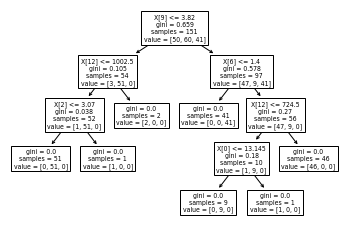

In [5]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test =  train_test_split(df, data.target, test_size=0.15, random_state=42)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

prediction = clf.predict(x_test)
score = sklearn.metrics.accuracy_score(prediction,y_test)
print('Test Accuracy: ', score)

sklearn.tree.plot_tree(clf)
plt.show()



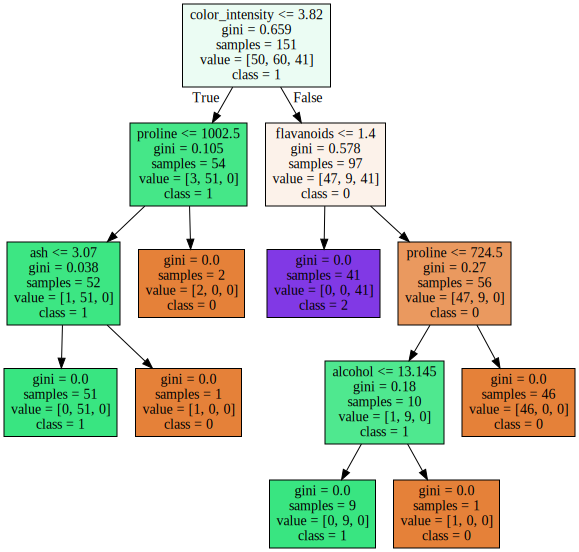

In [6]:
# Note that this tree is hard to read. So I'm going to display it in a better way with graphviz.

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=data.feature_names, class_names=['0', '1', '2'], filled = True))
display(SVG(graph.pipe(format='svg')))


## I create a decision tree classifer that splits based on the entropy criterion, rather than the Gini coefficient.

Test Accuracy:  0.8888888888888888


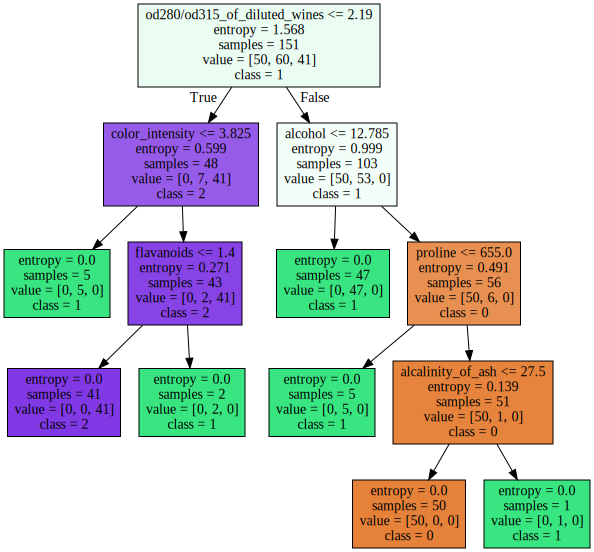

In [7]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2= clf2.fit(x_train,y_train)
prediction = clf2.predict(x_test)
score = sklearn.metrics.accuracy_score(prediction,y_test)
print('Test Accuracy: ', score)

graph = Source(tree.export_graphviz(clf2, out_file=None, feature_names=data.feature_names, class_names=['0', '1', '2'], filled = True))
display(SVG(graph.pipe(format='svg')))




## I remove the feature at the root of the decision tree, and I create a new classifier based on this new feature set. I compare the accuracies between the two models.

In [8]:
df2=df.drop(['od280/od315_of_diluted_wines'],axis=1)
x_train, x_test, y_train, y_test =  train_test_split(df2, data.target, test_size=0.15, random_state=42)

clf3 = tree.DecisionTreeClassifier(criterion='entropy')
clf3= clf3.fit(x_train,y_train)
prediction = clf3.predict(x_test)

score = clf3.score(x_test, y_test)
print('Test Accuracy: ', score)


Test Accuracy:  0.9629629629629629



## I remove the 'hue' feature (which should be a leave of your tree), and I create a new classifier based on this new feature set. I compare the accuracies between the two models.

In [9]:

df3=df.drop(['hue'],axis=1)
x_train, x_test, y_train, y_test =  train_test_split(df, data.target, test_size=0.15, random_state=42)
clf4 = tree.DecisionTreeClassifier(criterion='entropy')
clf4= clf4.fit(x_train,y_train)
prediction = clf4.predict(x_test)

score =clf4.score(x_test, y_test)
print('Test Accuracy: ', score)



Test Accuracy:  0.8888888888888888
